In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from matplotlib.backends.backend_pdf import PdfPages

In [127]:
files = glob('../data/data_file_*.csv')
print(files)

['../data/data_file_supriyo.csv', '../data/data_file_trung.csv', '../data/data_file_feride.csv', '../data/data_file_hy.csv', '../data/data_file_mehdi.csv']


In [128]:
usecols = ['stock', 'date', 'neg', 'neu', 'pos', 'compound', 
            'open', 'high', 'low','close', 'adj close', 'volume']
data = []
for file_i in files:
    data_i = pd.read_csv(file_i)
    data_i = data_i.rename(str.lower, axis='columns')
    data_i = data_i[usecols]
    
    print(data_i.shape)
    print(data_i.columns)
    data.append(data_i)
    
data_combined = pd.concat(data, ignore_index=True)    

(120, 12)
Index(['stock', 'date', 'neg', 'neu', 'pos', 'compound', 'open', 'high', 'low',
       'close', 'adj close', 'volume'],
      dtype='object')
(123, 12)
Index(['stock', 'date', 'neg', 'neu', 'pos', 'compound', 'open', 'high', 'low',
       'close', 'adj close', 'volume'],
      dtype='object')
(120, 12)
Index(['stock', 'date', 'neg', 'neu', 'pos', 'compound', 'open', 'high', 'low',
       'close', 'adj close', 'volume'],
      dtype='object')
(121, 12)
Index(['stock', 'date', 'neg', 'neu', 'pos', 'compound', 'open', 'high', 'low',
       'close', 'adj close', 'volume'],
      dtype='object')
(122, 12)
Index(['stock', 'date', 'neg', 'neu', 'pos', 'compound', 'open', 'high', 'low',
       'close', 'adj close', 'volume'],
      dtype='object')


In [129]:
data_combined.to_csv('../data/combined_data_file.csv', index=False)

In [130]:
data_combined

,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,BAC,2023-10-01,0.0485,0.8330,0.1190,0.9958,NaN,NaN,NaN,NaN,NaN,NaN
1,BAC,2023-10-02,0.0485,0.8330,0.1190,0.9958,27.270000,27.360001,26.580000,26.700001,26.700001,50388600.0
2,BAC,2023-10-03,0.0200,0.8730,0.1070,0.9932,26.490000,26.520000,25.820000,25.910000,25.910000,62144500.0
3,BAC,2023-10-04,0.0200,0.8730,0.1070,0.9932,25.879999,26.010000,25.580000,25.940001,25.940001,55696400.0
4,BAC,2023-10-05,0.1065,0.8100,0.0835,-0.3283,25.780001,26.090000,25.559999,26.059999,26.059999,49044100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
601,VZ,2023-10-27,0.0245,0.8640,0.1115,0.9889,34.380001,34.590000,33.340000,33.439999,33.439999,23924800.0
602,VZ,2023-10-28,0.0290,0.8610,0.1100,0.9920,NaN,NaN,NaN,NaN,NaN,NaN
603,VZ,2023-10-29,0.0250,0.8495,0.1255,0.9966,NaN,NaN,NaN,NaN,NaN,NaN
604,VZ,2023-10-30,0.0250,0.8495,0.1255,0.9966,33.840000,34.799999,33.840000,34.619999,34.619999,31497700.0


In [131]:

stocks = np.unique(data_combined['stock'])
for i, stock in enumerate(stocks):
    mask = data_combined['stock'] == stock
    stock_data = data_combined[mask]
    
    # Now you can work with the data for each stock (e.g., print, analyze, etc.)
    print(f"{stock_data}")

    stock        date     neg     neu     pos  compound        open  \
243  AAPL  2023-10-01  0.0605  0.8815  0.0575   -0.4582         NaN   
244  AAPL  2023-10-02  0.0410  0.8930  0.0660    0.2672  171.220001   
245  AAPL  2023-10-03  0.0215  0.9080  0.0705    0.9749  172.259995   
246  AAPL  2023-10-04  0.0170  0.8830  0.1000    0.9827  171.089996   
247  AAPL  2023-10-05  0.0180  0.8855  0.0965    0.9552  173.789993   
248  AAPL  2023-10-06  0.0365  0.8190  0.1440    0.9986  173.800003   
249  AAPL  2023-10-07  0.0160  0.8480  0.1360    0.9996         NaN   
250  AAPL  2023-10-08  0.0140  0.8985  0.0870    0.9927         NaN   
251  AAPL  2023-10-09  0.0140  0.8705  0.1145    0.9926  176.809998   
252  AAPL  2023-10-10  0.0475  0.8430  0.1090    0.4090  178.100006   
253  AAPL  2023-10-11  0.0775  0.8620  0.0605   -0.4294  178.199997   
254  AAPL  2023-10-12  0.0480  0.8905  0.0615    0.5066  180.070007   
255  AAPL  2023-10-13  0.0480  0.8905  0.0615    0.5066  181.419998   
256  A

118  106.160004  104.540001  105.849998  104.890846  22185200.0  


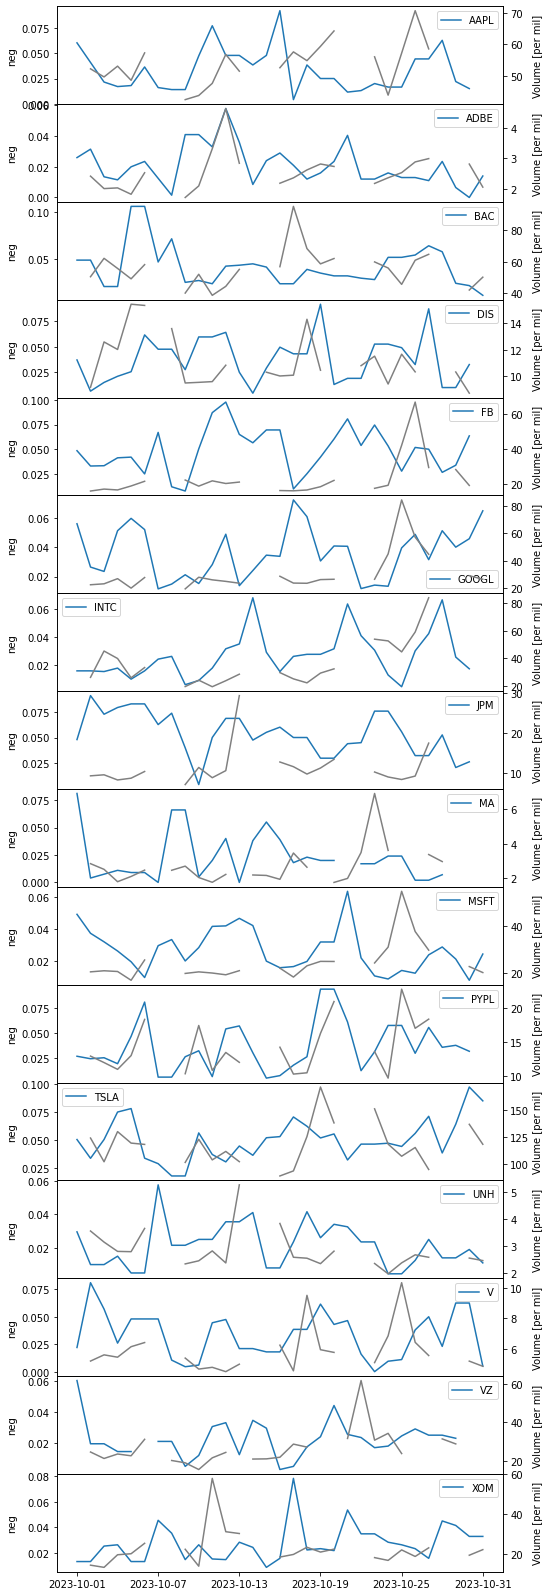

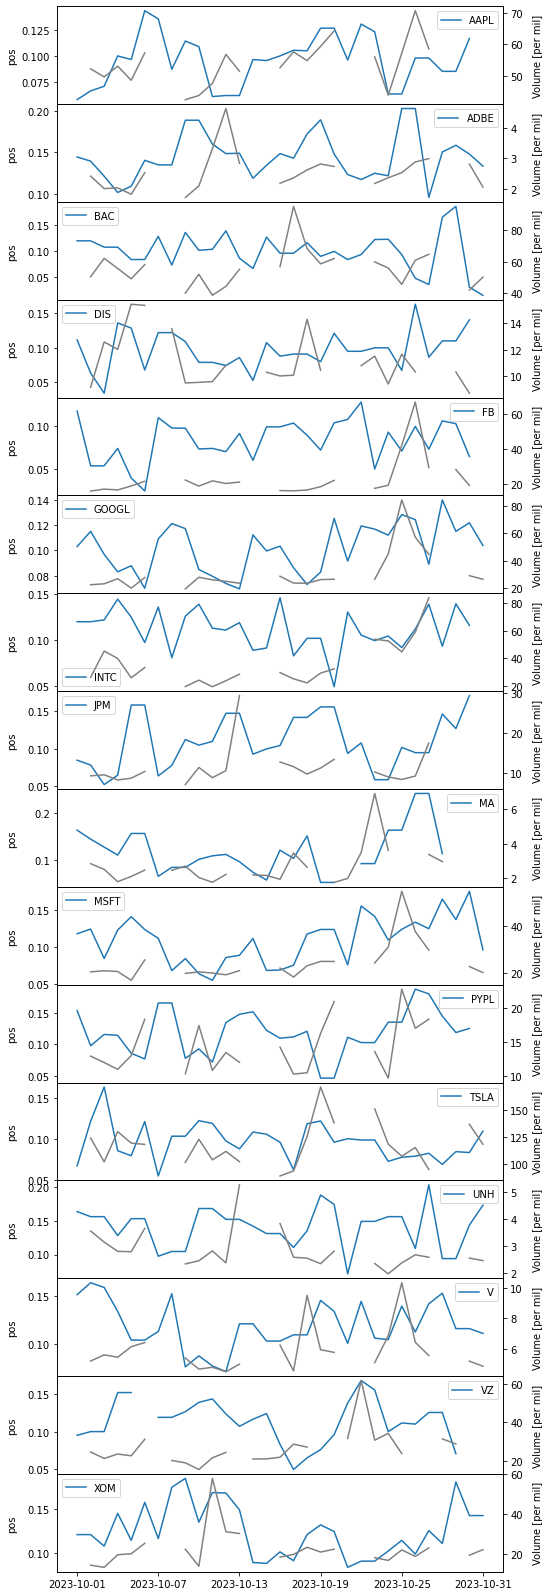

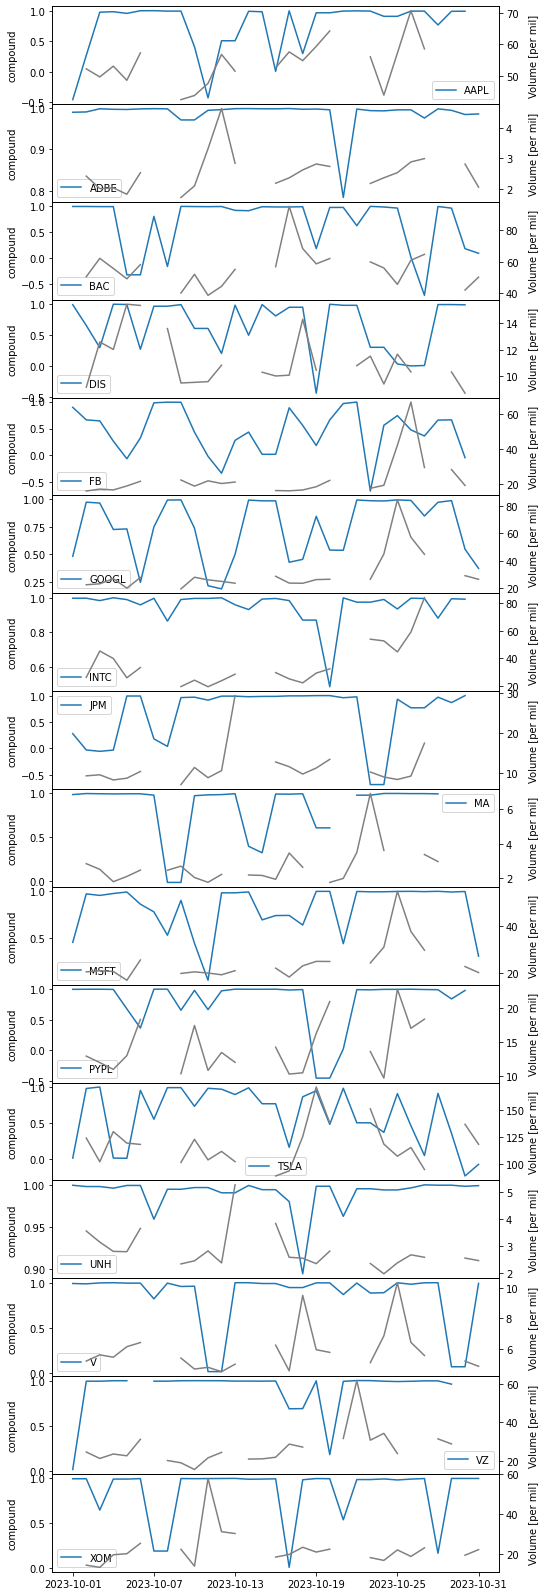

In [14]:
stocks = np.unique(data_combined['stock'])
nrows = len(stocks)

with PdfPages('scores_volume_time.pdf') as pdf:
    
    for score in ['neg', 'pos', 'compound']:
        
        fg, ax = plt.subplots(nrows=nrows, figsize=(8, nrows*1.8), sharex=True)   
        
        for i, stock in enumerate(stocks):
            mask = data_combined['stock']==stock

            mydata = data_combined[mask].sort_values(by=['date'],ignore_index=True)

            axj = ax[i].twinx()
            ax[i].plot(mydata['date'], mydata[score], label=stock)
            axj.plot(mydata['date'], mydata['volume']/1.0e6, label=stock, color='grey')

            ax[i].set_ylabel(score)
            axj.set_ylabel('Volume [per mil]')
            ax[i].legend()

        ax[0].xaxis.set_major_locator(plt.MaxNLocator(6))    
        fg.subplots_adjust(hspace=0.0)
        fg.align_labels()
        pdf.savefig(fg, bbox_inches='tight')

In [132]:
df=pd.read_csv("../data/combined_data_file.csv")

In [133]:
stocks

array(['AAPL', 'ADBE', 'AMZN', 'BAC', 'DIS', 'FB', 'GOOGL', 'HD', 'INTC',
       'JNJ', 'JPM', 'MA', 'MSFT', 'NVDA', 'PYPL', 'TSLA', 'UNH', 'V',
       'VZ', 'XOM'], dtype=object)

In [170]:
df

,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,BAC,2023-10-01,0.0485,0.8330,0.1190,0.9958,NaN,NaN,NaN,NaN,NaN,NaN
1,BAC,2023-10-02,0.0485,0.8330,0.1190,0.9958,27.270000,27.360001,26.580000,26.700001,26.700001,50388600.0
2,BAC,2023-10-03,0.0200,0.8730,0.1070,0.9932,26.490000,26.520000,25.820000,25.910000,25.910000,62144500.0
3,BAC,2023-10-04,0.0200,0.8730,0.1070,0.9932,25.879999,26.010000,25.580000,25.940001,25.940001,55696400.0
4,BAC,2023-10-05,0.1065,0.8100,0.0835,-0.3283,25.780001,26.090000,25.559999,26.059999,26.059999,49044100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
601,VZ,2023-10-27,0.0245,0.8640,0.1115,0.9889,34.380001,34.590000,33.340000,33.439999,33.439999,23924800.0
602,VZ,2023-10-28,0.0290,0.8610,0.1100,0.9920,NaN,NaN,NaN,NaN,NaN,NaN
603,VZ,2023-10-29,0.0250,0.8495,0.1255,0.9966,NaN,NaN,NaN,NaN,NaN,NaN
604,VZ,2023-10-30,0.0250,0.8495,0.1255,0.9966,33.840000,34.799999,33.840000,34.619999,34.619999,31497700.0


In [178]:
df1=df.copy()

In [188]:
data1=[]
for s in stocks:
    data=df1[df1.stock==s].interpolate(method = 'linear', inplace = False, limit_direction = "both")
    data1.append(data)
data=pd.concat(data1, ignore_index=True)

data.to_csv("final.csv")

In [186]:
data

0              NaN
1     5.038860e+07
2     6.214450e+07
3     5.569640e+07
4     4.904410e+07
5     5.812070e+07
6     5.206503e+07
7     4.600937e+07
8     3.995370e+07
9     5.196010e+07
10    3.850820e+07
11    4.424980e+07
12    5.508970e+07
13    5.566563e+07
14    5.624157e+07
15    5.681750e+07
16    9.534420e+07
17    6.837110e+07
18    5.861100e+07
19    6.202980e+07
20    6.130560e+07
21    6.058140e+07
22    5.985720e+07
23    5.597570e+07
24    4.552240e+07
25    6.092100e+07
26    6.470930e+07
27    5.710350e+07
28    4.949770e+07
29    4.189190e+07
30    5.010670e+07
Name: volume, dtype: float64

In [189]:
df_new=pd.read_csv("final.csv")

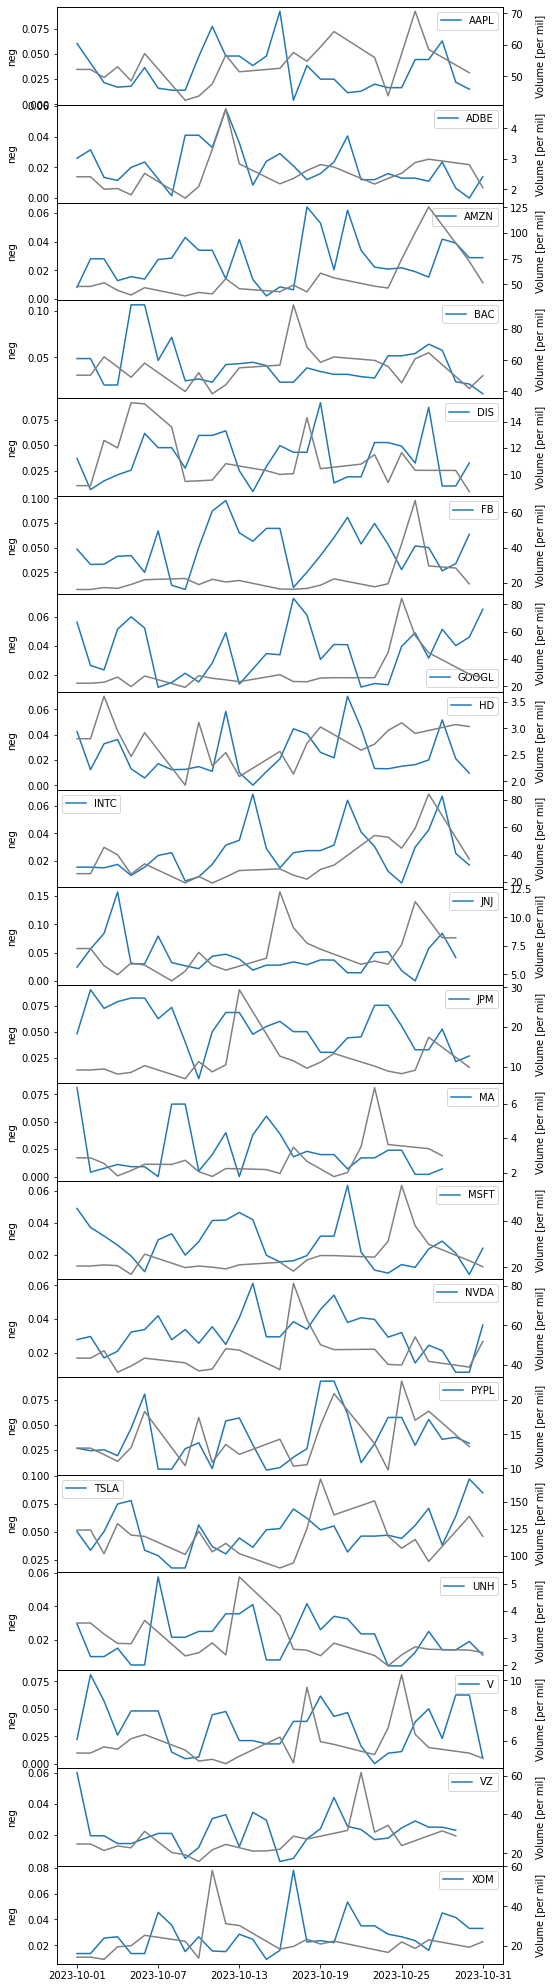

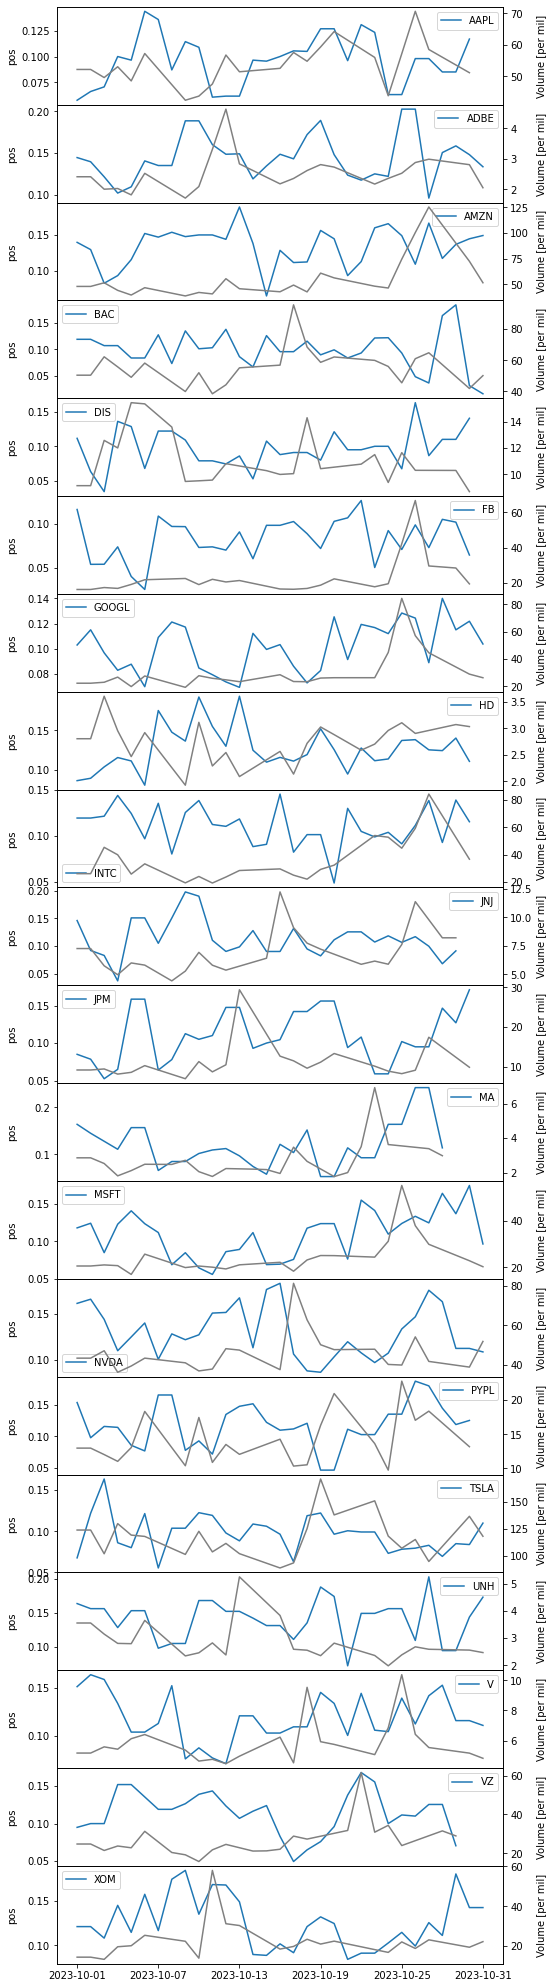

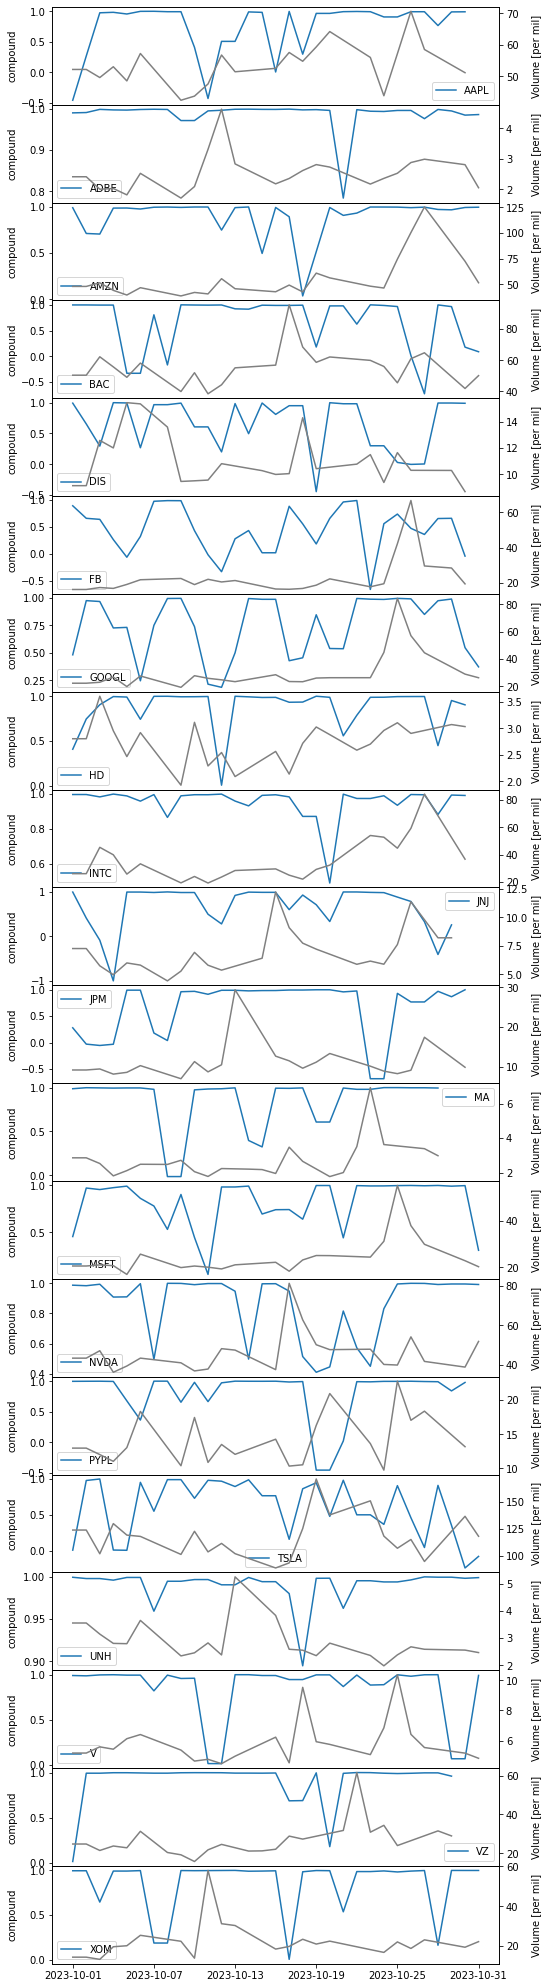

In [190]:
stocks = np.unique(df_new['stock'])
nrows = len(stocks)

with PdfPages('scores_volume_time_new.pdf') as pdf:
    
    for score in ['neg', 'pos', 'compound']:
        
        fg, ax = plt.subplots(nrows=nrows, figsize=(8, nrows*1.8), sharex=True)   
        
        for i, stock in enumerate(stocks):
            mask = df_new['stock']==stock

            mydata = df_new[mask].sort_values(by=['date'],ignore_index=True)

            axj = ax[i].twinx()
            ax[i].plot(mydata['date'], mydata[score], label=stock)
            axj.plot(mydata['date'], mydata['volume']/1.0e6, label=stock, color='grey')

            ax[i].set_ylabel(score)
            axj.set_ylabel('Volume [per mil]')
            ax[i].legend()

        ax[0].xaxis.set_major_locator(plt.MaxNLocator(6))    
        fg.subplots_adjust(hspace=0.0)
        fg.align_labels()
        pdf.savefig(fg, bbox_inches='tight')

In [191]:
df1=pd.read_csv('../data/interpolated_final_data.csv')
stocks=df1.stock.unique()
df2=[]
for i in stocks:
    data=df1[df1['stock']==i].sort_values(by='date')
    df2.append(data)
df = pd.concat(df2, ignore_index=True).reset_index(drop=True)
df.to_csv("../data/interpolated_final_data.csv")

In [107]:
df[['neg', 'pos', 'neu','compound']].fillna(method='ffill')


,neg,pos,neu,compound
0,0.0485,0.1190,0.8330,0.9958
1,0.0485,0.1190,0.8330,0.9958
2,0.0200,0.1070,0.8730,0.9932
3,0.0200,0.1070,0.8730,0.9932
4,0.1065,0.0835,0.8100,-0.3283
...,...,...,...,...
480,0.0245,0.1115,0.8640,0.9889
481,0.0290,0.1100,0.8610,0.9920
482,0.0250,0.1255,0.8495,0.9966
483,0.0250,0.1255,0.8495,0.9966


## Filling the nan scores with previous day scores

In [117]:
#df1=[]
#for i in stocks:
 #   data=df[df['stock']==i].fillna(method='ffill')
  #  df1.append(data)
#df = pd.concat(df1, ignore_index=True)
#df.to_csv("../data/interpolated_final_data.csv")
#df

,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,BAC,2023-10-01,0.0485,0.8330,0.1190,0.9958,NaN,NaN,NaN,NaN,NaN,NaN
1,BAC,2023-10-02,0.0485,0.8330,0.1190,0.9958,27.270000,27.360001,26.580000,26.700001,26.700001,50388600.0
2,BAC,2023-10-03,0.0200,0.8730,0.1070,0.9932,26.490000,26.520000,25.820000,25.910000,25.910000,62144500.0
3,BAC,2023-10-04,0.0200,0.8730,0.1070,0.9932,25.879999,26.010000,25.580000,25.940001,25.940001,55696400.0
4,BAC,2023-10-05,0.1065,0.8100,0.0835,-0.3283,25.780001,26.090000,25.559999,26.059999,26.059999,49044100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
480,VZ,2023-10-27,0.0245,0.8640,0.1115,0.9889,34.380001,34.590000,33.340000,33.439999,33.439999,23924800.0
481,VZ,2023-10-28,0.0290,0.8610,0.1100,0.9920,34.380001,34.590000,33.340000,33.439999,33.439999,26449100.0
482,VZ,2023-10-29,0.0250,0.8495,0.1255,0.9966,34.380001,34.590000,33.340000,33.439999,33.439999,28973400.0
483,VZ,2023-10-30,0.0250,0.8495,0.1255,0.9966,33.840000,34.799999,33.840000,34.619999,34.619999,31497700.0


In [192]:
df=pd.read_csv('../data/interpolated_final_data.csv')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  606 non-null    int64  
 1   Unnamed: 0    606 non-null    int64  
 2   stock         606 non-null    object 
 3   date          606 non-null    object 
 4   neg           606 non-null    float64
 5   neu           606 non-null    float64
 6   pos           606 non-null    float64
 7   compound      606 non-null    float64
 8   open          606 non-null    float64
 9   high          606 non-null    float64
 10  low           606 non-null    float64
 11  close         606 non-null    float64
 12  adj close     606 non-null    float64
 13  volume        606 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 66.4+ KB


In [194]:
stocks_df=df.copy()
#stocks_df.drop(columns=["open", "high", "low", "close", "adj close"], axis=1, inplace=True)

In [205]:
stocks=stocks_df.stock.unique()
df_train=[]
for i in stocks:
    data=stocks_df[stocks_df.stock==i].iloc[:-5]
    df_train.append(data)
data_train = pd.concat(df_train, ignore_index=True)        
data_train.to_csv("train.csv")

In [206]:
df_test=[]
for i in stocks:
    data=stocks_df[stocks_df.stock==i].iloc[-5:]
    df_test.append(data)
data_test = pd.concat(df_test, ignore_index=True)

data_test.to_csv("test.csv")

In [214]:
datatst=data_test.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
datatrn=data_train.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
datatst.to_csv("test.csv")
datatrn.to_csv("train.csv")

In [213]:
datatrn

,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,AAPL,2023-10-01,0.0605,0.8815,0.0575,-0.4582,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
1,AAPL,2023-10-02,0.0410,0.8930,0.0660,0.2672,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
2,AAPL,2023-10-03,0.0215,0.9080,0.0705,0.9749,172.259995,173.630005,170.820007,172.399994,172.173172,4.959460e+07
3,AAPL,2023-10-04,0.0170,0.8830,0.1000,0.9827,171.089996,174.210007,170.970001,173.660004,173.431519,5.302030e+07
4,AAPL,2023-10-05,0.0180,0.8855,0.0965,0.9552,173.789993,175.449997,172.679993,174.910004,174.679871,4.852790e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
501,XOM,2023-10-22,0.0350,0.8740,0.0910,0.9863,111.393331,111.746666,109.383334,109.993332,108.996633,1.960327e+07
502,XOM,2023-10-23,0.0350,0.8740,0.0910,0.9863,110.629997,110.959999,108.680000,109.449997,108.458221,1.818500e+07
503,XOM,2023-10-24,0.0285,0.8685,0.1025,0.9935,109.699997,109.820000,108.120003,108.389999,107.407829,1.678610e+07
504,XOM,2023-10-25,0.0265,0.8590,0.1145,0.9820,108.519997,109.500000,108.129997,108.589996,107.606010,2.204730e+07


In [125]:
len(stocks)

16

In [203]:
data_test.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,AAPL,2023-10-26,0.0445,0.8575,0.0980,0.9924,170.369995,171.380005,165.669998,166.889999,166.670425,7.062530e+07
1,AAPL,2023-10-27,0.0445,0.8575,0.0980,0.9924,166.910004,168.960007,166.830002,168.220001,167.998672,5.849910e+07
2,AAPL,2023-10-28,0.0630,0.8520,0.0850,0.7656,167.613337,169.696671,167.510000,168.909998,168.687759,5.604307e+07
3,AAPL,2023-10-29,0.0220,0.8930,0.0850,0.9895,168.316671,170.433334,168.189997,169.599996,169.376846,5.358703e+07
4,AAPL,2023-10-30,0.0150,0.8685,0.1170,0.9913,169.020004,171.169998,168.869995,170.289993,170.065933,5.113100e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
95,XOM,2023-10-27,0.0160,0.8585,0.1255,0.9978,108.889999,109.860001,104.959999,105.550003,104.593567,2.309200e+07
96,XOM,2023-10-28,0.0450,0.8440,0.1110,0.1631,107.839999,108.713333,105.043332,105.660001,104.702568,2.185463e+07
97,XOM,2023-10-29,0.0415,0.7780,0.1805,0.9990,106.789998,107.566666,105.126666,105.769999,104.811569,2.061727e+07
98,XOM,2023-10-30,0.0330,0.8245,0.1425,0.9987,105.739998,106.419998,105.209999,105.879997,104.920570,1.937990e+07
